# 1. Contextualização
## 1.1. Metas e objetivos
## 1.2. Estrutura do dataset

|Coluna|Descrição|
|---|---|
|``Id``|Identificador único da transação|
|``Data``|Data da transação|
|``Produto``|Nome do produto|
|``Categoria``|Categoria do produto|
|``Quantidade``|Quantidade vendida na transação|
|``Preço``|Preço do produto|

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [421]:
# Manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt
import sqlalchemy

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fast')
blue_palette = ['#003f5c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
sns.set_palette(blue_palette)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [422]:
engine = sqlalchemy.create_engine('sqlite:///../data/database.db')

with open ('query.sql', 'r') as open_file:
    query = open_file.read()

In [423]:
df = pd.read_sql(query, engine)

## Qualidade dos dados

In [424]:
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset contém 5000 linhas e 6 colunas.


In [425]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 3 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [426]:
print(f"O dataset possui {df.duplicated().sum()} dados duplicados.")

O dataset possui 0 dados duplicados.


In [427]:
print(f"O dataset possui {df.isnull().sum().sum()} dados nulos.")

O dataset possui 0 dados nulos.


In [428]:
for col in df.columns:
    print(df[col].name)
    print(df[col].unique())
    print('=' * 50)

Id
[   1    2    3 ... 4998 4999 5000]
Data
['2023-09-06' '2023-02-13' '2023-01-10' '2023-10-15' '2023-04-17'
 '2023-04-06' '2023-03-28' '2023-02-24' '2023-10-14' '2023-02-09'
 '2023-09-20' '2023-12-13' '2023-07-31' '2023-02-03' '2023-08-18'
 '2023-06-13' '2023-01-13' '2023-01-12' '2023-02-06' '2023-03-26'
 '2023-04-01' '2023-07-16' '2023-08-22' '2023-01-11' '2023-08-06'
 '2023-03-19' '2023-10-06' '2023-09-10' '2023-09-30' '2023-06-12'
 '2023-03-27' '2023-06-24' '2023-08-17' '2023-04-19' '2023-11-11'
 '2023-12-04' '2023-01-03' '2023-10-22' '2023-11-09' '2023-03-04'
 '2023-09-29' '2023-06-14' '2023-05-13' '2023-04-18' '2023-03-02'
 '2023-03-25' '2023-10-24' '2023-05-11' '2023-05-28' '2023-02-07'
 '2023-05-20' '2023-11-26' '2023-05-14' '2023-08-23' '2023-04-13'
 '2023-11-10' '2023-01-17' '2023-10-11' '2023-06-28' '2023-07-28'
 '2023-02-18' '2023-12-25' '2023-01-31' '2023-08-03' '2023-04-24'
 '2023-11-19' '2023-09-02' '2023-08-29' '2023-12-10' '2023-12-01'
 '2023-05-21' '2023-08-13' '2023

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          5000 non-null   int64  
 1   Data        5000 non-null   object 
 2   Produto     5000 non-null   object 
 3   Categoria   5000 non-null   object 
 4   Quantidade  5000 non-null   int64  
 5   Preço       5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [430]:
df.head()

,Id,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-09-06,BASIC Notebook,Laptop,1,1817.51
1,2,2023-02-13,MOBA Setup,Desktop,1,3785.69
2,3,2023-01-10,BASIC Notebook,Laptop,1,2273.69
3,4,2023-10-15,BASIC Notebook,Laptop,1,2213.34
4,5,2023-04-17,Mouse,Periféricos,4,27.80


### Manipulação e limpeza dos dados

Será necessário mudar o tipos dos dados na `Data` para o tipo datetime.

In [431]:
df["Data"] = pd.to_datetime(df["Data"], format = '%Y-%m-%d')
df = df.sort_values(by = "Data")

# Com os dados limpos, agora bastar salvar o dataset
df.to_csv("../data/processed/data_clean.csv", index = False)
df.head()

,Id,Data,Produto,Categoria,Quantidade,Preço
2645,2646,2023-01-01,Webcam,Periféricos,5,142.14
740,741,2023-01-01,Joystick,Periféricos,1,359.03
395,396,2023-01-01,Teclado,Periféricos,1,127.42
1415,1416,2023-01-01,PRO Notebook,Laptop,1,2714.84
1501,1502,2023-01-01,MOBA Setup,Desktop,1,2630.64


Agora a criação das colunas solicitada no teste, e uma coluna de mes para análises mais a frente.

In [432]:
df["total_vendas"] = df["Quantidade"] * df["Preço"]
df["mes"] = df["Data"].dt.strftime("%Y-%m")
df.head() 

,Id,Data,Produto,Categoria,Quantidade,Preço,total_vendas,mes
2645,2646,2023-01-01,Webcam,Periféricos,5,142.14,710.70,2023-01
740,741,2023-01-01,Joystick,Periféricos,1,359.03,359.03,2023-01
395,396,2023-01-01,Teclado,Periféricos,1,127.42,127.42,2023-01
1415,1416,2023-01-01,PRO Notebook,Laptop,1,2714.84,2714.84,2023-01
1501,1502,2023-01-01,MOBA Setup,Desktop,1,2630.64,2630.64,2023-01


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2645 to 4698
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            5000 non-null   int64         
 1   Data          5000 non-null   datetime64[ns]
 2   Produto       5000 non-null   object        
 3   Categoria     5000 non-null   object        
 4   Quantidade    5000 non-null   int64         
 5   Preço         5000 non-null   float64       
 6   total_vendas  5000 non-null   float64       
 7   mes           5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 351.6+ KB


# 3. Análise Exploratória dos Dados
## 3.1. Estatísticas descritivas

In [434]:
df.select_dtypes(include = 'number').describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Quantidade,5000.0,1.28,0.84,1.00,1.00,1.00,1.00,5.00
Preço,5000.0,4365.20,5720.25,11.37,359.57,2413.18,5792.89,29995.35
total_vendas,5000.0,4738.30,6500.15,11.37,484.60,2469.74,6173.15,83165.37


In [435]:
df["Quantidade"].value_counts(normalize = True)

Quantidade
1    0.8784
3    0.0384
2    0.0364
5    0.0240
4    0.0228
Name: proportion, dtype: float64

- Em relação o Preço (e por consequência o Total de Vendas) uma média maior que a mediana indica uma assimétria à direita.
- Já quanto a Quantidade de produtos comprados em cada transação, em 87,84% foi de apenas um produto. 

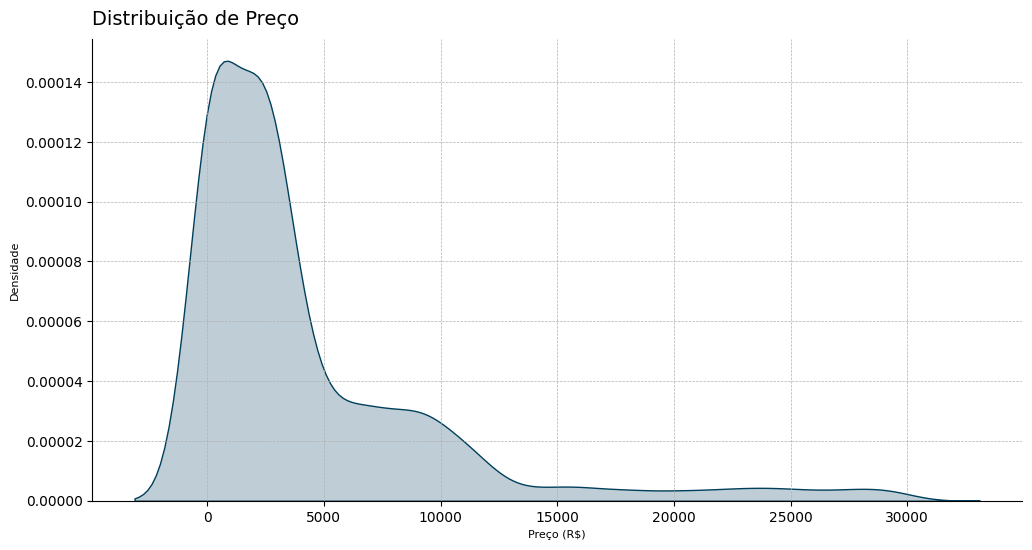

In [436]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(df["Preço"], fill = True)
ax.set_title("Distribuição de Preço", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Preço (R$)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

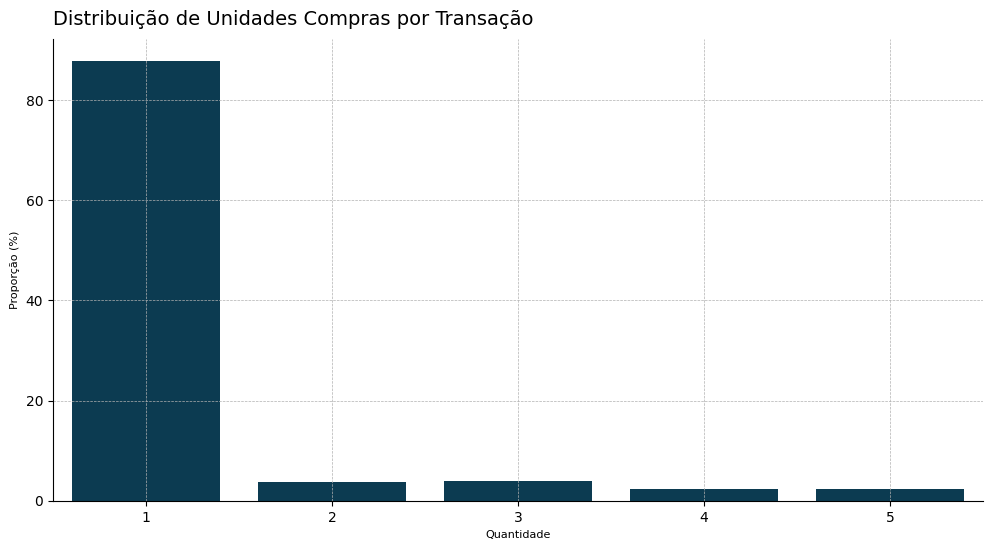

In [437]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df["Quantidade"], stat = 'percent')
ax.set_title("Distribuição de Unidades Compras por Transação", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Quantidade", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [438]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
Produto,5000,12,BASIC Notebook,593
Categoria,5000,3,Laptop,1754
mes,5000,12,2023-09,457


- O produto com a maior frequência de transações é o **BASIC Notebook**, e em relação a categoria foi a de **Laptops**.
- Setembro foi o mês com o maior número de transações. 

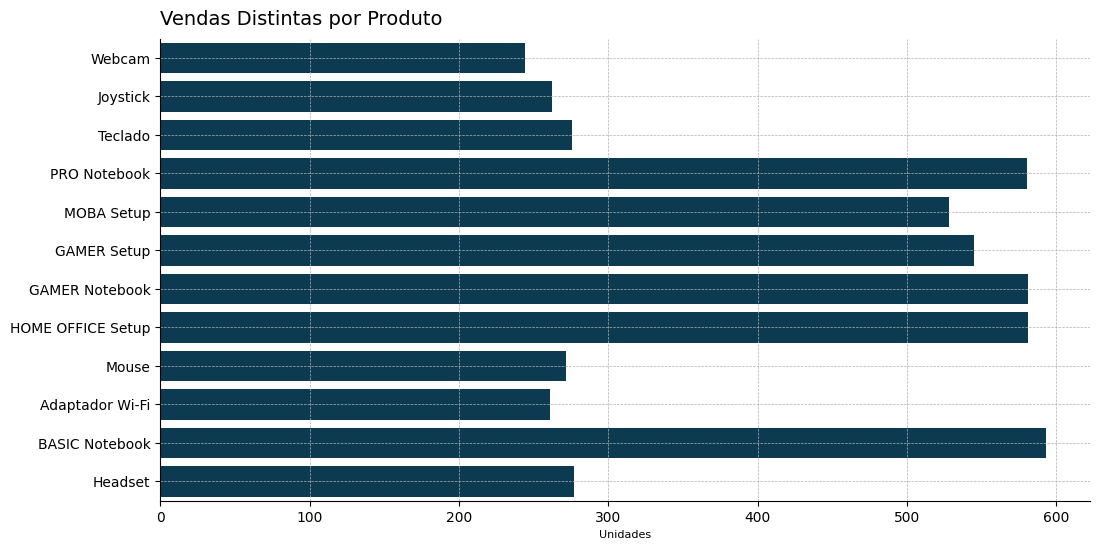

In [439]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df["Produto"])
ax.set_title("Vendas Distintas por Produto", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Unidades", fontsize = 8)
ax.set_ylabel("", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

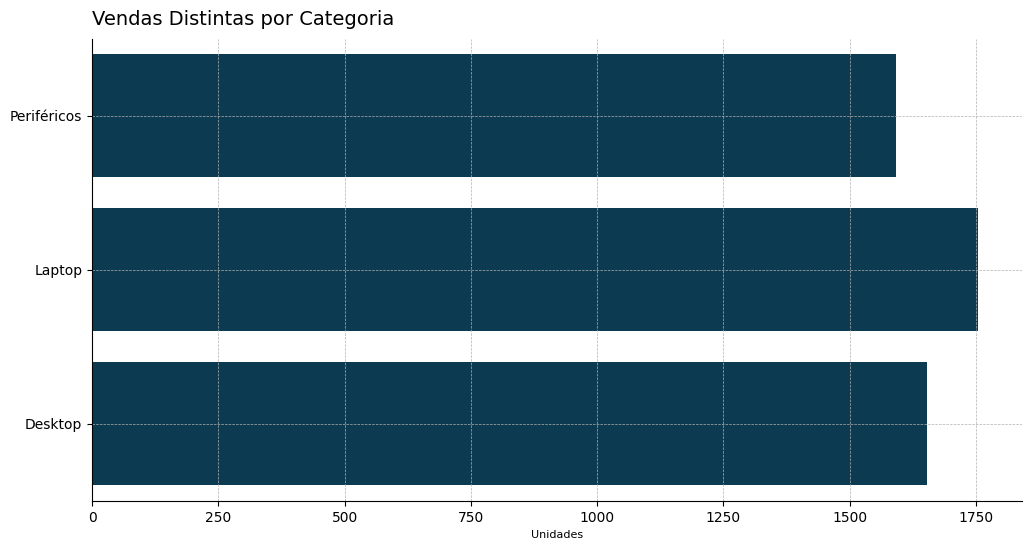

In [440]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df["Categoria"])
ax.set_title("Vendas Distintas por Categoria", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Unidades", fontsize = 8)
ax.set_ylabel("", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## 3.2. Explorando as features

### Categoria x Faturamento & Volume de Vendas

In [441]:
categoria = df.groupby("Categoria").agg(unidades = ("Quantidade", "sum"), faturamento = ("total_vendas", "sum")).reset_index()
categoria

,Categoria,unidades,faturamento
0,Desktop,1781,14543358.32
1,Laptop,1889,8527975.97
2,Periféricos,2718,620177.26


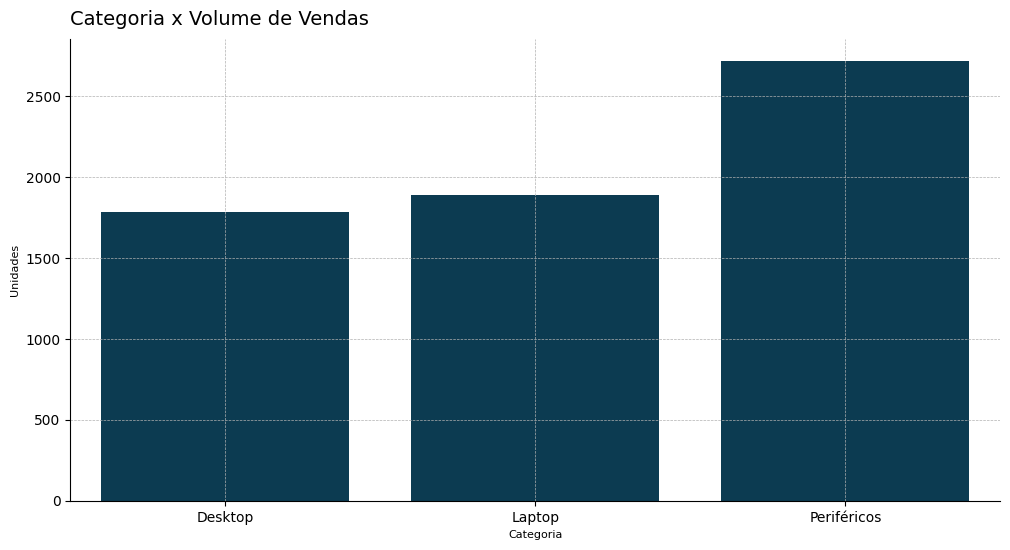

In [442]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(categoria, x = "Categoria", y = "unidades")
ax.set_title("Categoria x Volume de Vendas",loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Categoria", fontsize = 8)
ax.set_ylabel("Unidades", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

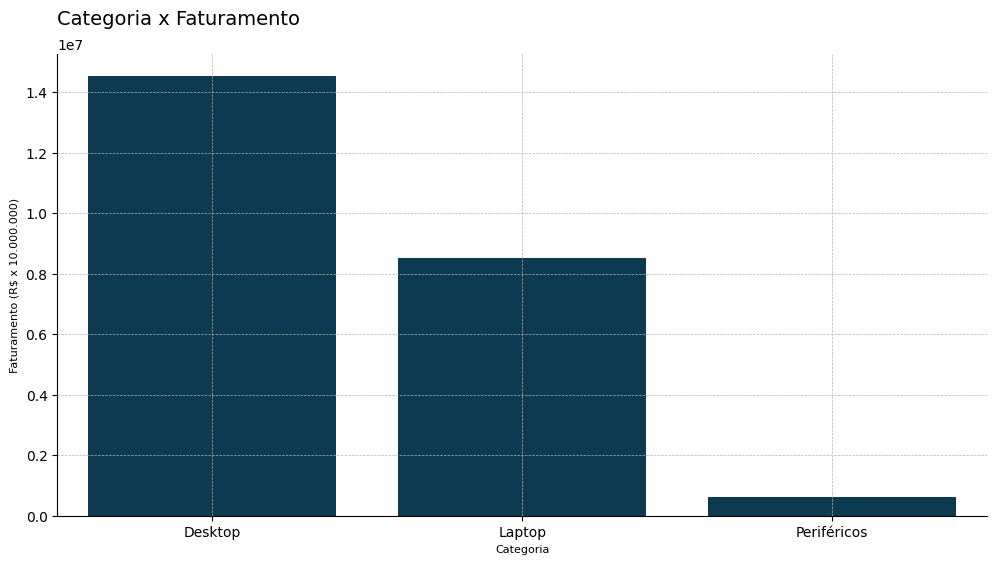

In [443]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(categoria, x = "Categoria", y = "faturamento")
ax.set_title("Categoria x Faturamento",loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Categoria", fontsize = 8)
ax.set_ylabel("Faturamento (R$ x 10.000.000)", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Apesar do alto volume de vendas, os periféricos são os que deixam menor faturamento para a loja sendo a categoria de Desktop a com maior valor agregado e aquela que gera maior faturamento.

### Produtos x Faturamento & Volume de Vendas

In [444]:
produtos = df.groupby("Produto").agg(unidades = ("Quantidade", "sum"), faturamento = ("total_vendas", "sum")).reset_index()
produtos

,Produto,unidades,faturamento
0,Adaptador Wi-Fi,420,38130.90
1,BASIC Notebook,638,1369465.61
2,GAMER Notebook,628,5127692.36
3,GAMER Setup,584,9687528.57
4,HOME OFFICE Setup,627,1413332.54
5,Headset,476,131287.02
6,Joystick,440,140334.50
7,MOBA Setup,570,3442497.21
8,Mouse,474,46661.72
9,PRO Notebook,623,2030818.00


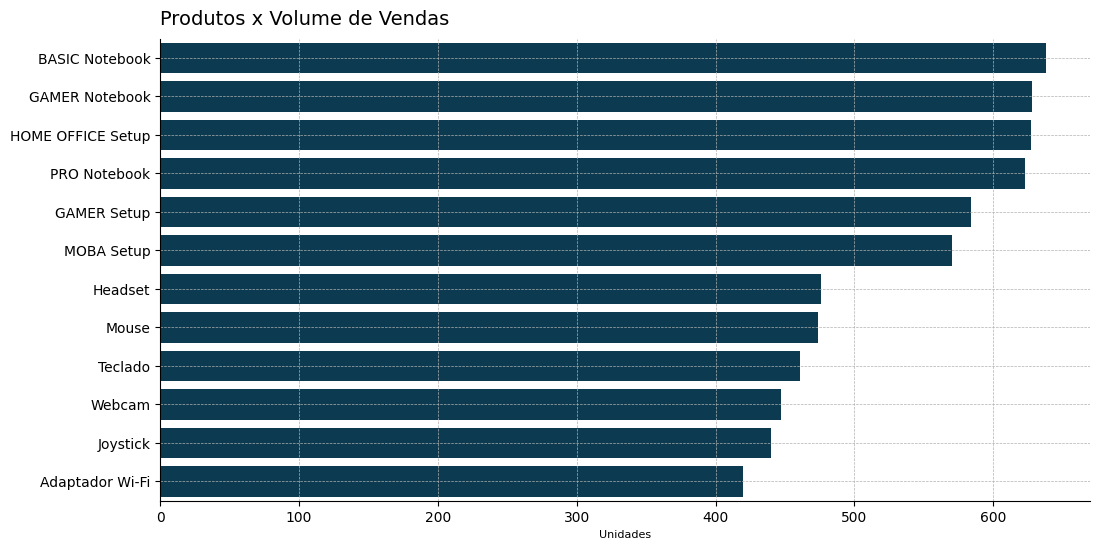

In [445]:
produtos = produtos.sort_values(by = "unidades", ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(produtos, x = "unidades", y = "Produto", orient = 'h')
ax.set_title("Produtos x Volume de Vendas", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Unidades", fontsize = 8)
ax.set_ylabel("")
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

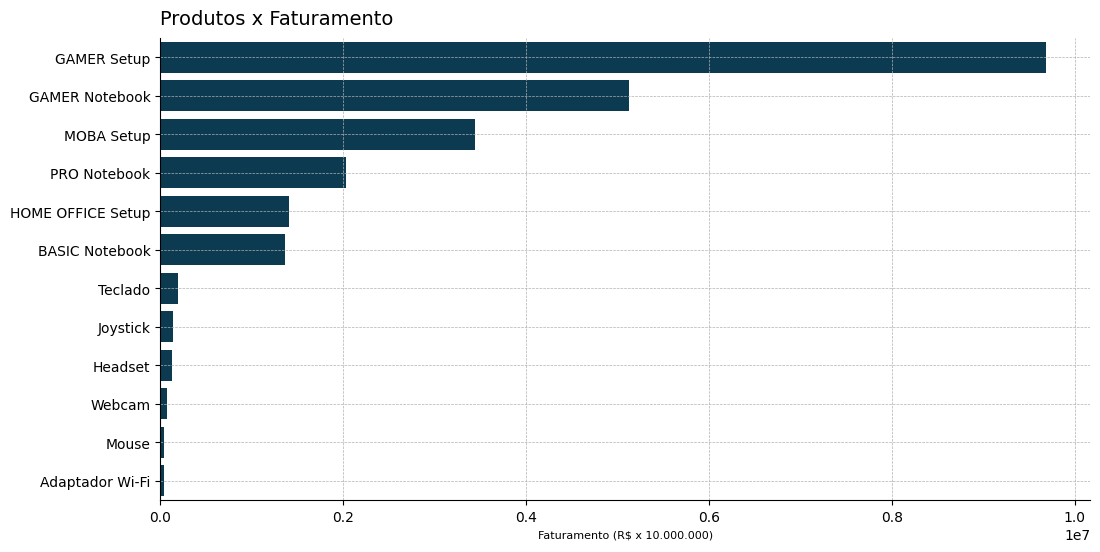

In [446]:
produtos = produtos.sort_values(by = "faturamento", ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(produtos, x = "faturamento", y = "Produto", orient = 'h')
ax.set_title("Produtos x Faturamento", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Faturamento (R$ x 10.000.000)", fontsize = 8)
ax.set_ylabel("")
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

A linha de produtos mais rentável é a **GAMER** tanto para Laptops quanto para Desktops, apesar da maior quantidade de unidades vendidas o Laptop **BASIC Notebook** é apenas o 6º em faturamento.

### O desempenho no período analisando

In [451]:
revenue = df.groupby("Data").agg(faturamento = ('total_vendas', 'sum')).reset_index()
revenue["media_movel"] = revenue["faturamento"].rolling(window = 30).mean()
revenue.head()

,Data,faturamento,media_movel
0,2023-01-01,37081.97,NaN
1,2023-01-02,49916.12,NaN
2,2023-01-03,51619.50,NaN
3,2023-01-04,91822.41,NaN
4,2023-01-05,8737.50,NaN


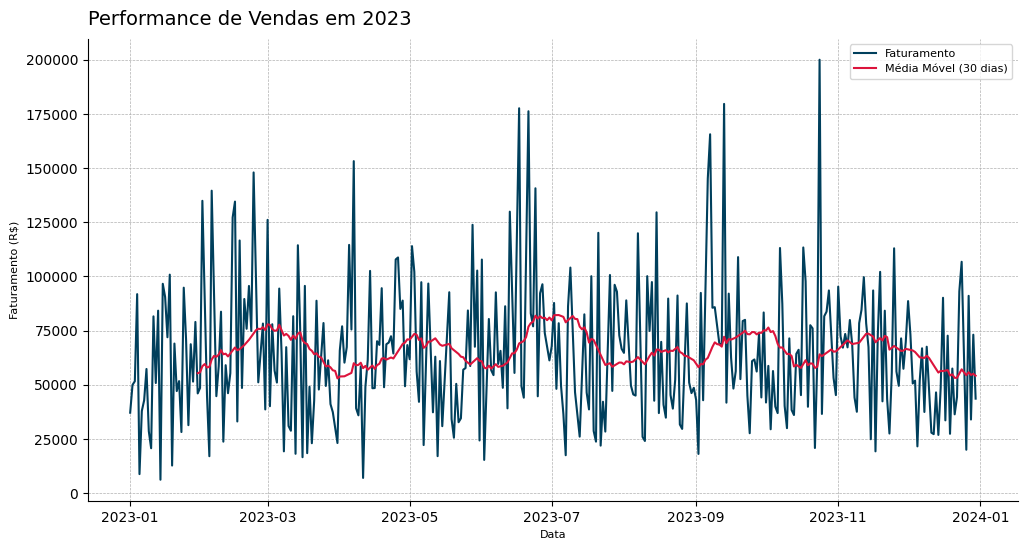

In [452]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(x = revenue["Data"], y = revenue["faturamento"], label = "Faturamento", ax = ax)
sns.lineplot(x = revenue["Data"], y = revenue["media_movel"], color = 'crimson', label = "Média Móvel (30 dias)", ax = ax)
ax.set_title("Performance de Vendas em 2023", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Data", fontsize = 8)
ax.set_ylabel("Faturamento (R$)", fontsize = 8)
ax.legend(loc = 'upper right', fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Observando a média móvel, o faturamento apresenta uma tendência de queda. Vamos analisar de forma mensal, para ter uma curva mais suave, além de observar também as tendência por cada Categoria de Produto.

In [ ]:
revenue_month = df.groupby(["mes", "Categoria"]).agg(faturamento = ('total_vendas', 'sum')).reset_index()

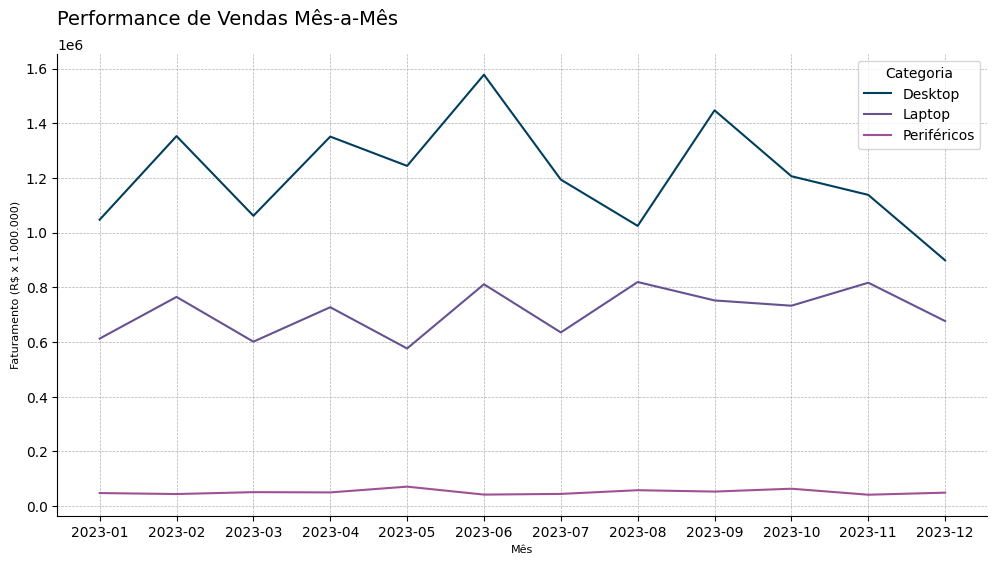

In [453]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(x = revenue_month["mes"], y = revenue_month["faturamento"], hue = revenue_month["Categoria"])
ax.set_title("Performance de Vendas Mês-a-Mês", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Mês", fontsize = 8)
ax.set_ylabel("Faturamento (R$ x 1.000.000)", fontsize = 8)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Existe uma tendência de queda nas vendas a cada 3 meses, observando as três categórias a única que apresenta crescimento é a de periféricos, que é a menos rentável.